<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;应用系统体系架构 - 人工智能模块 </h1>

<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A2：卷积神经网络 - 作业</h1>

<br/>


### 关于这个Notebook

在这个Notebook中，大家参照上课的CIFAR-10的案例，构建卷积神经网络来对CIFAR-100数据集中的图像进行分类，并且确保分类准确率可以超过45%。

### 构建对CIFAR-100数据集中的图像进行分类的CNN

有关 CIFAR-100 的详细内容可以参阅：
https://www.cs.toronto.edu/~kriz/cifar.html


### 构建卷积神经网络(Convolutional Neural Nets)
<font color=red>作业要求：</font>

- <font color=red>你可以使用Keras来构建和训练自己的卷积神经网络，并通过调整超参数使你的模型的分类准确率可以达到45%以上。</font>

下面是导入必要的包、加载数据和进行数据预处理的代码：

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


array([[[ 92,  73,  46],
        [ 96,  73,  44],
        [ 96,  69,  40],
        ...,
        [134, 100,  55],
        [136, 101,  57],
        [139, 105,  61]],

       [[ 94,  75,  47],
        [ 95,  71,  42],
        [ 97,  70,  41],
        ...,
        [135, 101,  56],
        [136, 101,  56],
        [145, 110,  65]],

       [[ 97,  78,  52],
        [ 93,  71,  43],
        [101,  74,  46],
        ...,
        [129,  95,  54],
        [136, 102,  57],
        [143, 109,  64]],

       ...,

       [[157, 123,  85],
        [203, 184, 152],
        [209, 185, 134],
        ...,
        [164, 131,  85],
        [158, 122,  72],
        [173, 140,  97]],

       [[160, 129,  89],
        [172, 148, 122],
        [188, 162, 119],
        ...,
        [165, 132,  86],
        [167, 131,  81],
        [182, 149, 106]],

       [[166, 138,  99],
        [157, 130,  97],
        [152, 121,  82],
        ...,
        [159, 128,  82],
        [173, 136,  91],
        [180, 143, 100]]], dtype=uint8)
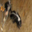

In [4]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape
x_train[444]

[75]


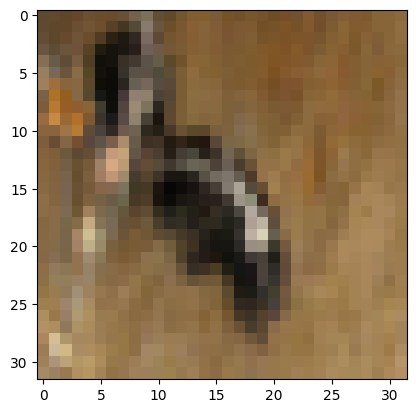

In [5]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [6]:
num_classes = 100

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras 中用于 CNN 的层
- 之前我们使用过基础的 Dense、Activation 和 Dropout 层构建过神经网络。

- 现在我们将描述如何使用Keras中提供的与CNN相关的一些层。

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

其中若干个参数的含义：
- `filters`: 每个位置使用的过滤器数量，换句话说，就是输出的深度。
- `kernel_size`: 一个 (x,y) 元素，给出了要使用的卷积核的高度和宽度。
- `strides`: 一个 (x,y) 元素，给出了在每一维上的步幅。默认值为 `(1,1)`
- `input_shape`: 只有第一层需要这个参数，表示输入的形状。

注意，输出的尺寸是由 kernel_size 和 strides 确定的。

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: 要池化的网格的 (x,y) 尺寸。
- `strides`: 假设等于 `pool_size` ，除非另外做了设定。

### Flatten
将其输入转换为一维向量。通常用于从卷积层转移到全连接层时。

---

## <font color=red> 构建你的CNN </font>
<font color=red> 下面看你的了，构建你自己的模型并进行训练。</font>

In [9]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant

# 定义模型
model = Sequential()

# 卷积模块1
model.add(Conv2D(256, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 卷积模块2
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 卷积模块3
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 卷积模块4
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 全连接层
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(num_classes, activation='softmax'))

# 编译模型
opt = keras.optimizers.RMSprop(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 打印模型结构
model.summary()

# 训练模型
model.fit(x_train, y_train,
              batch_size=64,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 512)           │              

 Total params: 15,795,556 (60.26 MB)

 Trainable params: 15,786,340 (60.22 MB)

 Non-trainable params: 9,216 (36.00 KB)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 127ms/step - accuracy: 0.0767 - loss: 4.1900 - val_accuracy: 0.1088 - val_loss: 4.1035
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 119ms/step - accuracy: 0.2638 - loss: 2.9215 - val_accuracy: 0.2513 - val_loss: 3.1788
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.3974 - loss: 2.2732 - val_accuracy: 0.3600 - val_loss: 2.4388
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 117ms/step - accuracy: 0.4802 - loss: 1.9152 - val_accuracy: 0.3335 - val_loss: 2.7275
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 116ms/step - accuracy: 0.5430 - loss: 1.6548 - val_accuracy: 0.3837 - val_loss: 2.4576
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 120ms/step - accuracy: 0.5931 - loss: 1.4426 - val_accuracy: 0.3910 - val_loss: 2.5351
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 116ms/step - accuracy: 0.6389 - loss: 1.2675 - val_accuracy: 0.5107 - val_loss: 1.8445
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 120ms/step - accuracy: 0

使用测试数据集验证你的模型的准确度

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.6368753910064697
Test accuracy: 0.6322000026702881
